## **Personal Loan Classification with Neural Network Architecture**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Bank_Loan_Granting.csv')

## **Data Exploration**

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Description for each features:
- `ID`: customer ID
- `Age`: customer age
- `Experience`: the number of years that customer has experience
- `Income`: the customer's annual earnings
- `ZIP Code`: the postal code of customer's location
- `Family`: the number of people in customer's family
- `CCAvg`: the average of monthly credit card spending
- `Education`: the level of customer's Education (undergraduate, graguate, professional)
- `Mortgage`: the Value of customer's mortgage (thing that the customer uses it as a guarantee to the bank)
- `Personal Loan`: the customer is granted loans or not
- `Securities Account`: the customer has a security account or not (it's also known as an investment account)
- `CD Account`: the customer has a CD account or not (a type of savings account that lets the customer earn interest on a fixed amount of money for a fixed period of time)
- `Online`: the customer uses the bank's online services or not
- `CreditCard`: the customer uses the bank's credit card or not

The target feature is `Personal Loan`

Looking at the description for each features, the `Income` and `CCAvg` values do not lie on the same range of time. `Income` recorded yearly, while `CCAvg` recorded monthly. Therefore, the `Income` will be converted into monthly record.

In [7]:
df['Income'] = df['Income']/12

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   object 
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


`CCAvg` data type needs to be converted to numeric

In [9]:
def convert_to_float(value):
    try:
        parts = value.split('/')
        numerator = float(parts[0])
        denominator = float(parts[1])
        return numerator / denominator
    except:
        # If division by zero, return NaN
        return float('nan')

df['CCAvg'] = df['CCAvg'].apply(convert_to_float)
df['CCAvg'] = df['CCAvg'].apply(pd.to_numeric)

print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [10]:
print(df.isnull().sum())

ID                      0
Age                     0
Experience              0
Income                  0
ZIP Code                0
Family                  0
CCAvg                 686
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
dtype: int64


`CCAvg` feature has 686 missing values. Handling missing values will be done after data splitting to prevent data leakage.

In [11]:
len(df[df.duplicated()])

0

In [12]:
categorical_values = df[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account',
                   'Online', 'CreditCard']]

for i in categorical_values:
  print(df[i].value_counts())
  print('\n')

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


Education
1    2096
3    1501
2    1403
Name: count, dtype: int64


Personal Loan
0    4520
1     480
Name: count, dtype: int64


Securities Account
0    4478
1     522
Name: count, dtype: int64


CD Account
0    4698
1     302
Name: count, dtype: int64


Online
1    2984
0    2016
Name: count, dtype: int64


CreditCard
0    3530
1    1470
Name: count, dtype: int64




## Univariate Analysis

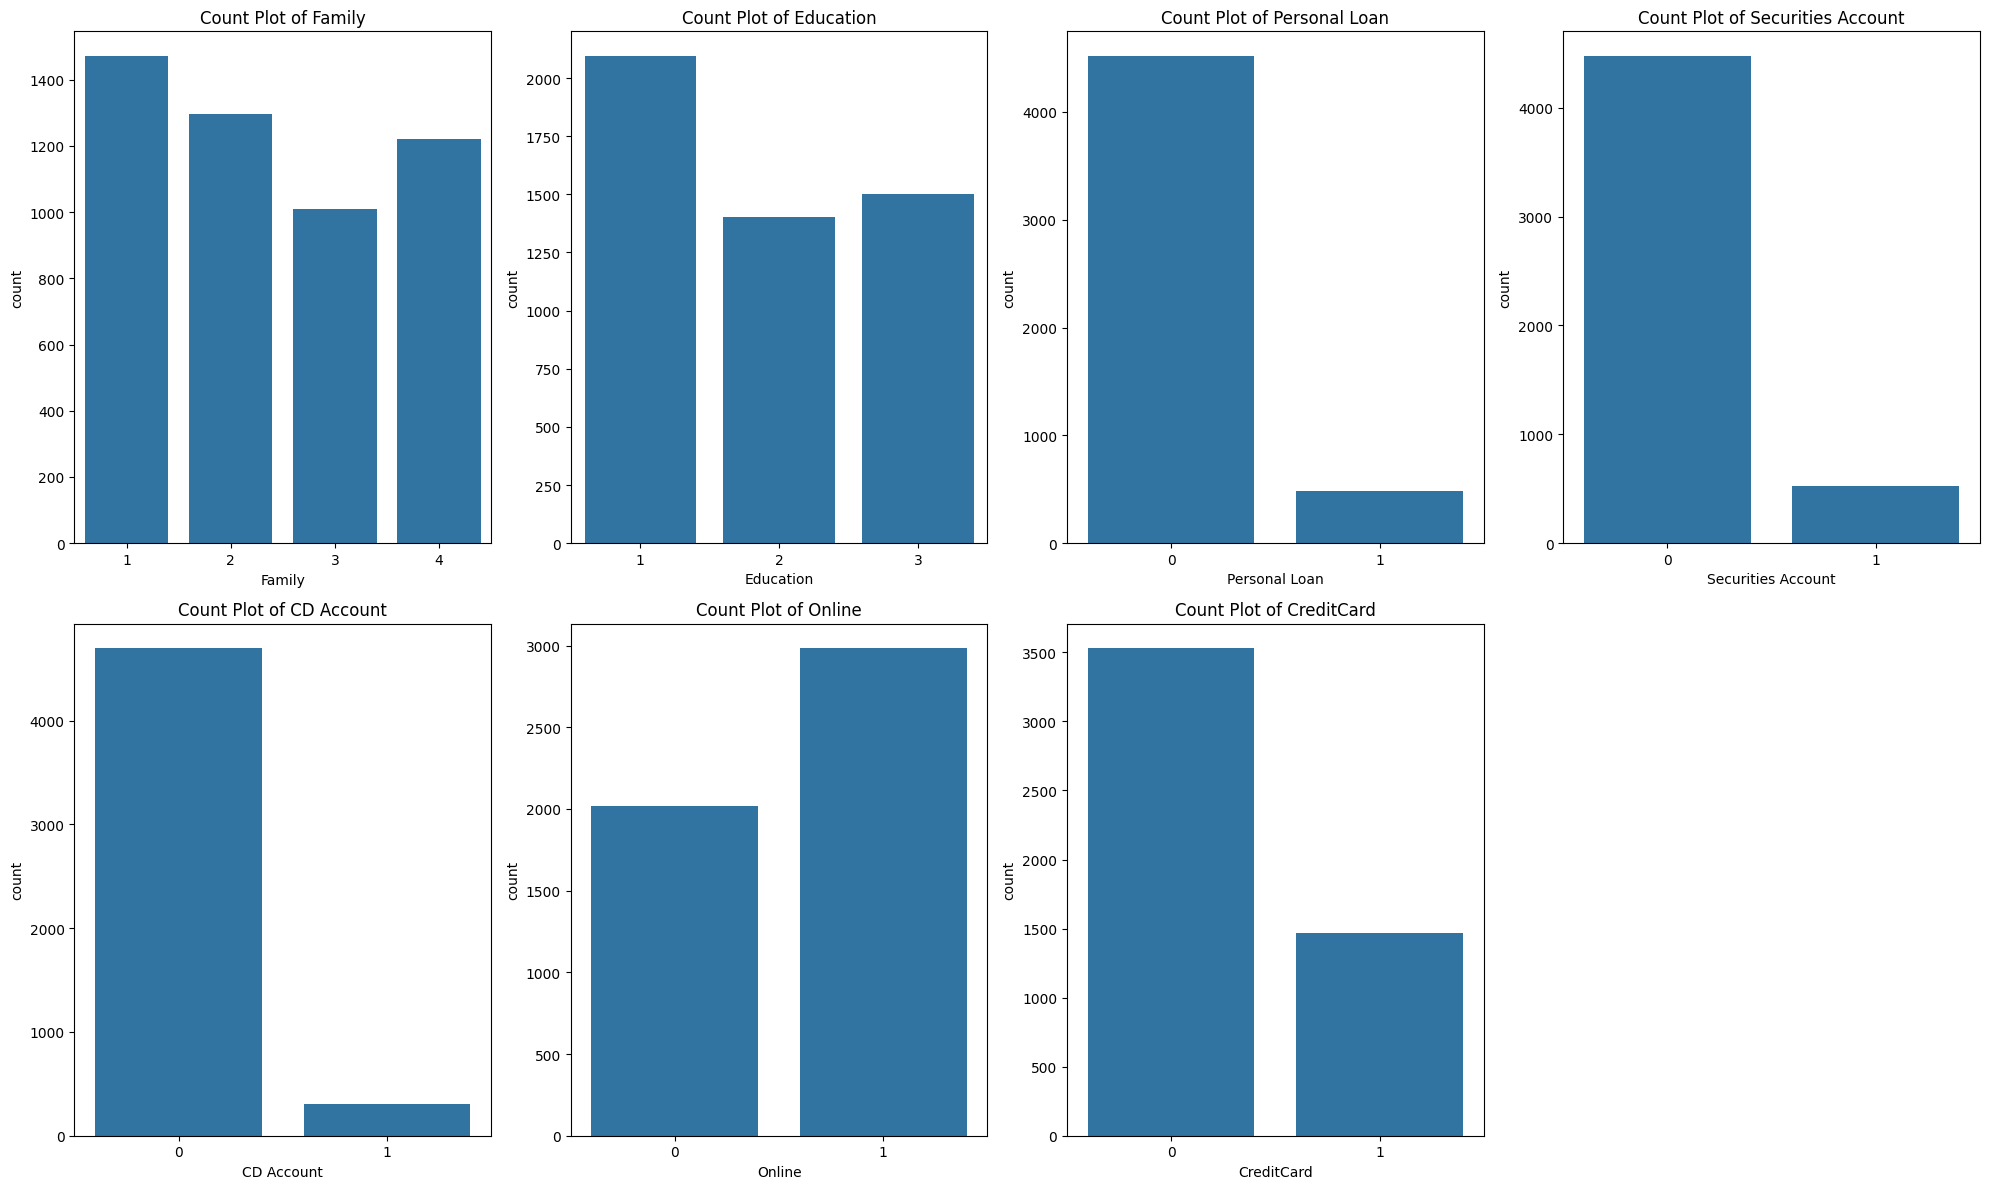

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_values.columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_title(f'Count Plot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
numeric_values = df.select_dtypes(include=[np.number]).columns

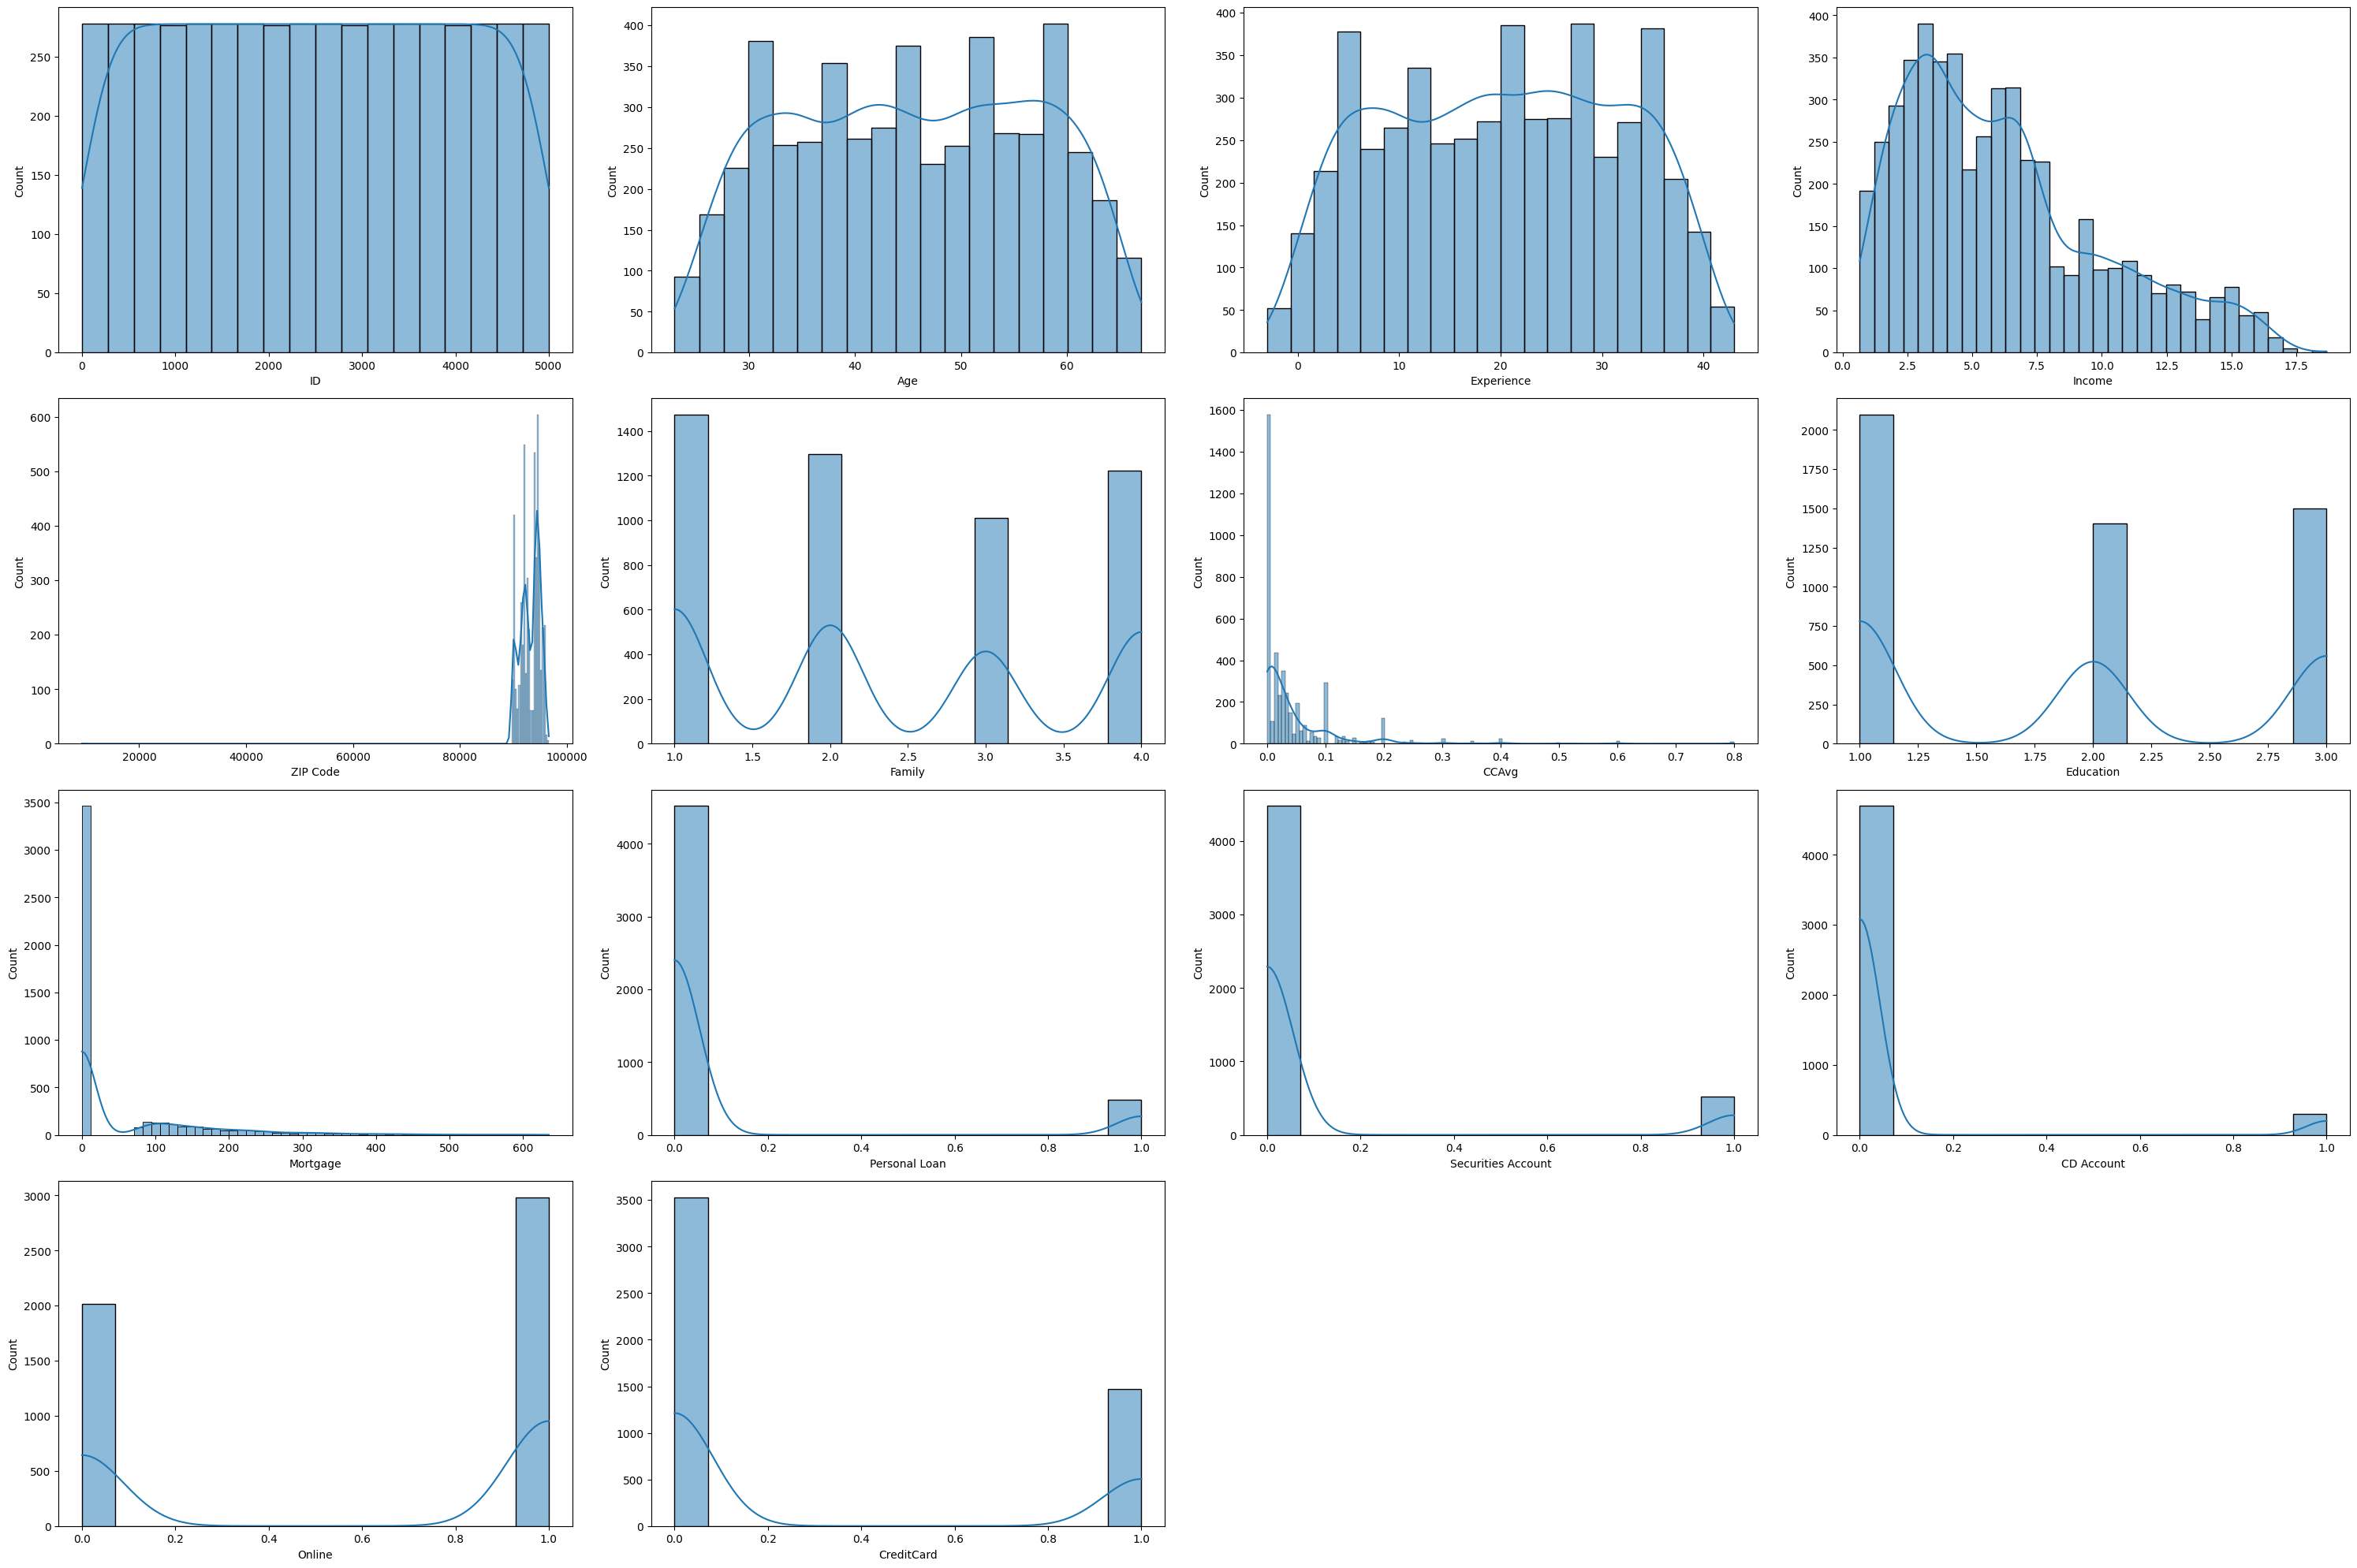

In [15]:
fig = plt.figure(figsize=(30, 20))

for i, col in enumerate(numeric_values, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

The data has imbalance distribution.

## Bivariate Analysis

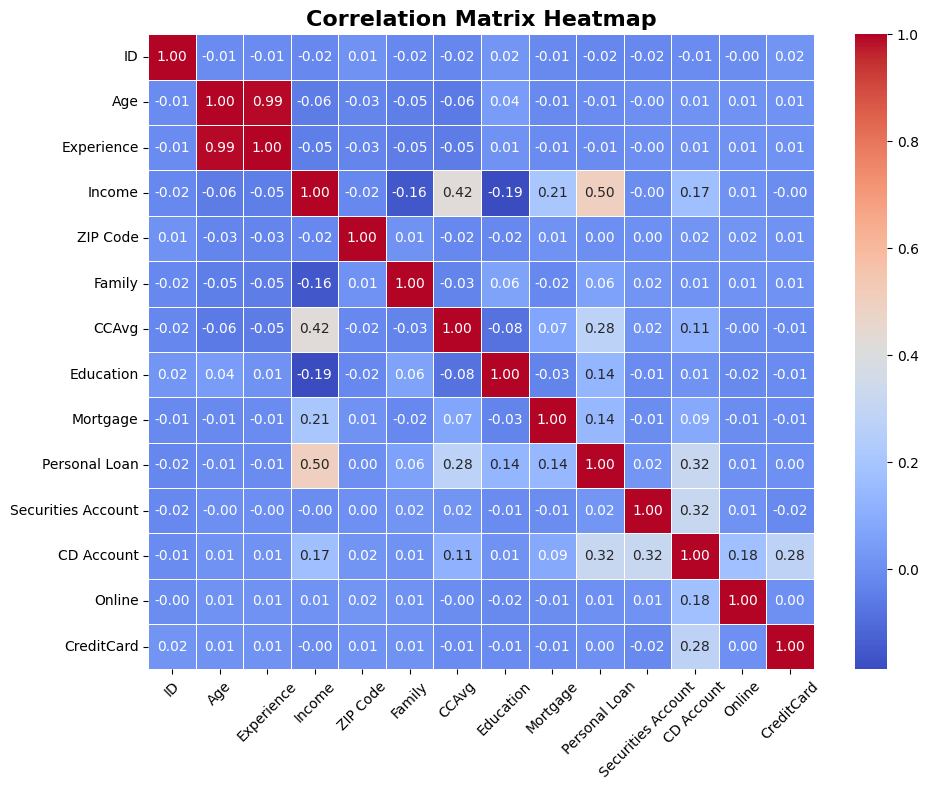

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Highly correlated features:
- `age` and `experience` -> positive correlation
- `education` and `income` -> negative correlation

Therefore, One of the features should be dropped to decrease model complexity while still use feature that is important.

Looking at the `age` and `experience` features, they both have -0.01 correlation with target variable. Therefore I will drop randomly. In this case I will drop the `experience` column. Furthermore, I will also drop the `education` feature since it shows 0.14 correlation to the target variable compared to `income` which correlates 0.5.



In [17]:
df = df.drop(columns=['Experience', 'Education'])

Nextly, the feature 'ID' should be dropped as well since it is a unique value (identifier) that is irrelevant to the data modelling.

In [18]:
df = df.drop(df.columns[0], axis=1)

## Check Outlier

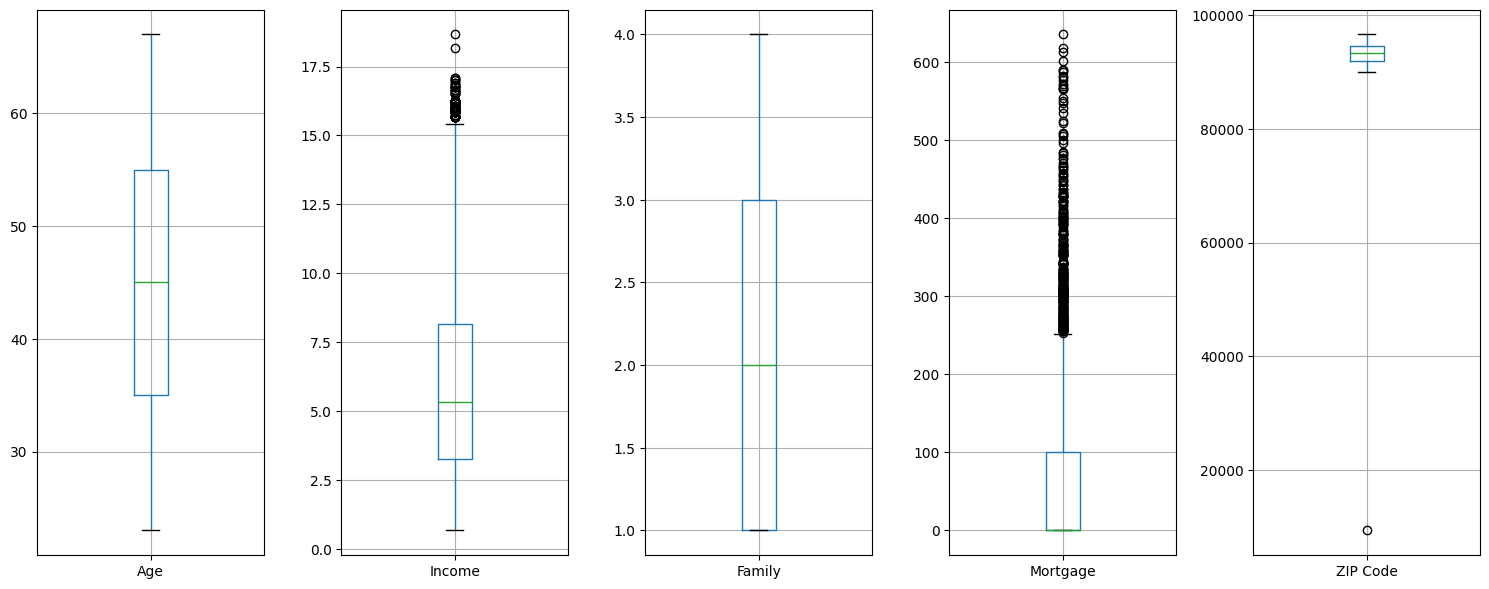

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))

age_boxplot = df.boxplot(column=['Age'], ax=axes[0])
income_boxplot = df.boxplot(column=['Income'], ax=axes[1])
family_boxplot = df.boxplot(column=['Family'], ax=axes[2])
mortgage_boxplot = df.boxplot(column=['Mortgage'], ax=axes[3])
zip_boxplot = df.boxplot(column=['ZIP Code'], ax=axes[4])

plt.tight_layout()
plt.show()

There are outliers on `Income`, `Mortgage`, and `Zip Code` features. I will try to look at the `ZIP Code` variable since it potentially leads to anomaly.

In [20]:
Q1 = np.percentile(df['ZIP Code'], 25)
Q3 = np.percentile(df['ZIP Code'], 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df['ZIP Code'][(df['ZIP Code'] < lower_bound) | (df['ZIP Code'] > upper_bound)]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}\n")
print(f"Outliers in ZIP Code:\n{outliers}")

Lower Bound: 87865.5
Upper Bound: 98653.5

Outliers in ZIP Code:
384    9307
Name: ZIP Code, dtype: int64


The `ZIP Code` should have 5 digits value (US Zip Code) but the outlier value showed only 4 digits. Therefore, this needs to be treated as an anomaly and should be removed.

In [21]:
df.drop(index=384,inplace=True)

## **Data Splitting**

80% for training data, 10% for validation data, 10% for testing data

In [22]:
new_df = df.copy()

In [23]:
x,y = new_df.drop(['Personal Loan'],axis=1), new_df['Personal Loan']

In [24]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(new_df.shape)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(4999, 11)
(3999, 10) (3999,)
(500, 10) (500,)
(500, 10) (500,)


## **Data Preprocessing**



## Check Missing Value

In [25]:
# TRAINING SET

print(x_train.isnull().sum())

Age                     0
Income                  0
ZIP Code                0
Family                  0
CCAvg                 553
Mortgage                0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
dtype: int64


There are 553 missing values on training data set on `CCAvg` column. Therefore, missing values imputation should be done before modelling.

First, I will check the distribution of the data.

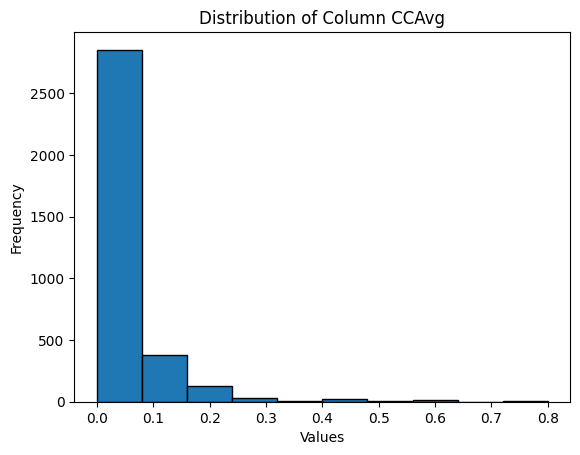

In [26]:
plt.hist(x_train['CCAvg'], edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Column CCAvg')
plt.show()

The distribution of the data shows right-skewed/positive-skewed, so I choose to impute the missing values by its median instead of mean.

In [27]:
median = x_train['CCAvg'].median()

x_train['CCAvg'] = x_train['CCAvg'].fillna(median)

In [28]:
print(x_train.isnull().sum())

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


Check the missing values on the validation and testing dataset as well.

In [29]:
# VALIDATION SET

print(x_val.isnull().sum())

Age                    0
Income                 0
ZIP Code               0
Family                 0
CCAvg                 74
Mortgage               0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64


In [30]:
# TESTING SET

print(x_test.isnull().sum())

Age                    0
Income                 0
ZIP Code               0
Family                 0
CCAvg                 59
Mortgage               0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64


There are missing values on validation & testing dataset on `CCAvg` feature. Therefore, I need to do missing values imputation with median from TRAINING set to prevent data leakage.

In [31]:
x_val['CCAvg'] = x_val['CCAvg'].fillna(median)

In [32]:
x_test['CCAvg'] = x_test['CCAvg'].fillna(median)

In [33]:
print(x_val['CCAvg'].isnull().sum())

0


In [34]:
print(x_test['CCAvg'].isnull().sum())

0


In [35]:
y.value_counts()

Personal Loan
0    4519
1     480
Name: count, dtype: int64

The data (both independent and target variables) is imbalanced. Therefore, I will do the SMOTE technique to treat this class imbalance.

## SMOTE Training Data

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [37]:
print('SMOTE Data')
print(pd.Series(y_train).value_counts())

SMOTE Data
Personal Loan
0    3619
1    3619
Name: count, dtype: int64


## Data Scaling

In [38]:
scaler = RobustScaler()
columns = x.columns
x_train[columns] = scaler.fit_transform(x_train[columns])
x_val[columns] = scaler.transform(x_val[columns])
x_test[columns] = scaler.transform(x_test[columns])

In [39]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32).shuffle(10)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32).shuffle(10)
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val)).batch(32).shuffle(10)

/Users/patriciapepita/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [40]:
print(val_ds)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 10), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


## **Modelling**

### **Model 1**
2 hidden layers with 32 nodes in each layers. Since it is a binary classification problem, the activation function for the output is sigmoid.

In [41]:
model = tf.keras.Sequential(
    [
        Dense(32, activation="relu",input_shape=(10,)),
        Dense(32, activation="relu"),
        Dense(1, activation='sigmoid'),
    ]
)
model.summary()

/Users/patriciapepita/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.predict(val_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.66160846],
       [0.6190463 ],
       [0.6125823 ],
       [0.5444736 ],
       [0.65057915],
       [0.5783645 ],
       [0.76961386],
       [0.5043533 ],
       [0.6014678 ],
       [0.5236991 ],
       [0.5025231 ],
       [0.49292165],
       [0.5611454 ],
       [0.58802444],
       [0.528096  ],
       [0.69975233],
       [0.7603733 ],
       [0.6989733 ],
       [0.6666898 ],
       [0.59695905],
       [0.6369876 ],
       [0.5502399 ],
       [0.6477321 ],
       [0.6508647 ],
       [0.6689326 ],
       [0.60886383],
       [0.5763038 ],
       [0.57370555],
       [0.5778865 ],
       [0.55013543],
       [0.7111044 ],
       [0.54925627],
       [0.54625344],
       [0.5681554 ],
       [0.6017877 ],
       [0.6264892 ],
       [0.66681147],
       [0.6444724 ],
       [0.61038005],
       [0.5785907 ],
       [0.49121404],
       [0.58033526],
       [0.7080867 ],
       [0.620188  ],
       [0.6601617 ],
       [0.67679197],
       [0.5925769 ],
       [0.580

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
              , loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Accuracy()])

In [44]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 50)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.6741 - loss: 0.5487 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.1060 - val_loss: 2.1829
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.7189 - loss: 0.6387 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.6440 - val_loss: 0.9847
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8398 - loss: 0.4175 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.6980 - val_loss: 0.8532
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8498 - loss: 0.3783 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7300 - val_loss: 0.7626
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8569 - loss: 0.3591 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7360 - val_loss: 0.7198
Epoch 6/50
227/227 ━━━━━━━━━━━

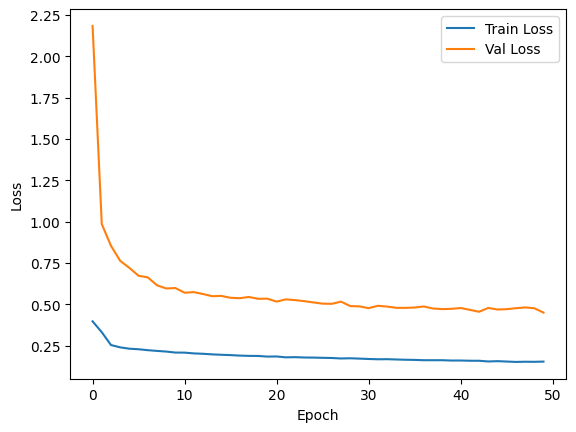

In [45]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

The model indicates a bit overfit since the gap between training and validation loss is visible. Therefore, I will try to decrease the model complexity.

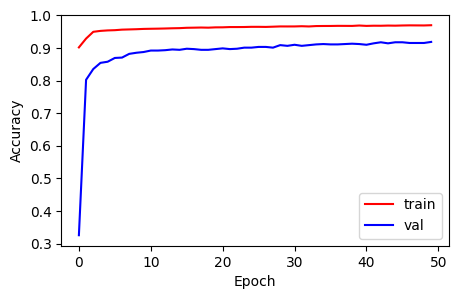

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(np.sqrt(history.history['binary_accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_binary_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=10)
ax.set_ylabel(r'Accuracy', fontsize=10)
ax.legend()
ax.tick_params(labelsize=10)

In [47]:
print("Evaluation results:")
for metric_name, metric_value in zip(model.metrics_names, model.evaluate(test_ds)):
    print(f"{metric_name}: {metric_value}")

Evaluation results:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8575 - loss: 0.3650
loss: 0.3891065716743469
compile_metrics: 0.8519999980926514


In [48]:
y_pred = model.predict(x_test)
def get_class_predictions(model, test_ds):
    y_pred_prob = model.predict(test_ds)
    predicted = tf.squeeze(y_pred)
    predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    return predicted

y_pred = get_class_predictions(model, x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
Confusion Matrix:
[[382  69]
 [  5  44]]
Accuracy: 0.852
F1 Score:  0.7274521936415334
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       451
           1       0.39      0.90      0.54        49

    accuracy                           0.85       500
   macro avg       0.69      0.87      0.73       500
weighted avg       0.93      0.85      0.88       500



### **Modified Architecture (Layers and Nodes Tuning)**
### **Model 2**

2 hidden layers with 16 nodes in each layers. 

In [49]:
model = tf.keras.Sequential(
    [
        Dense(16, activation="relu",input_shape=(10,)),
        Dense(16, activation="relu"),
        Dense(1, activation='sigmoid'),
    ]
)
model.summary()

/Users/patriciapepita/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.predict(val_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.52824867],
       [0.5155319 ],
       [0.48512384],
       [0.5932014 ],
       [0.48674038],
       [0.5392757 ],
       [0.52793497],
       [0.5355637 ],
       [0.5976083 ],
       [0.5596725 ],
       [0.5992754 ],
       [0.48562002],
       [0.6190857 ],
       [0.50738734],
       [0.5099532 ],
       [0.45393828],
       [0.51690155],
       [0.63778824],
       [0.49722862],
       [0.3169475 ],
       [0.49334553],
       [0.4434351 ],
       [0.53447354],
       [0.47419325],
       [0.5062866 ],
       [0.4901981 ],
       [0.66254205],
       [0.5485125 ],
       [0.42935175],
       [0.48813972],
       [0.46430454],
       [0.5817008 ],
       [0.45216766],
       [0.6256097 ],
       [0.44882786],
       [0.65181464],
       [0.48258084],
       [0.6081546 ],
       [0.6346658 ],
       [0.5030129 ],
       [0.4286194 ],
       [0.502735  ],
       [0.5125334 ],
       [0.50493   ],
       [0.5156389 ],
       [0.50708896],
       [0.49798083],
       [0.527

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
              , loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Accuracy()])

In [52]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 50)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.7289 - loss: 0.5793 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.1680 - val_loss: 1.5050
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.6690 - loss: 0.6575 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.6240 - val_loss: 0.9128
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8128 - loss: 0.4612 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7200 - val_loss: 0.7328
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8436 - loss: 0.3949 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7600 - val_loss: 0.6524
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8531 - loss: 0.3738 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7740 - val_loss: 0.6196
Epoch 6/50
227/227 ━━━━━━━━━━━

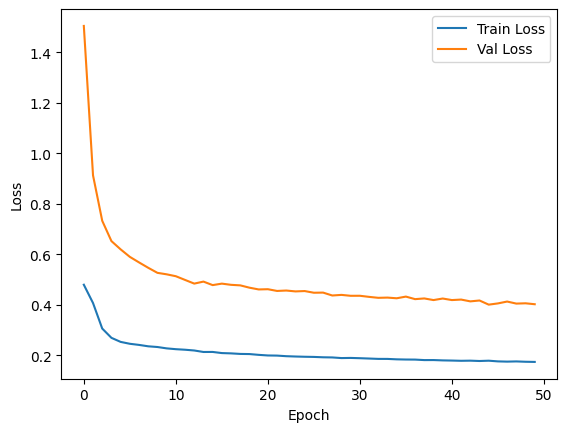

In [53]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

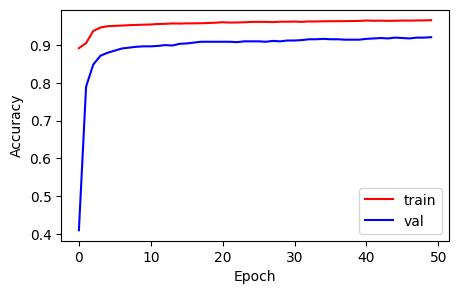

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(np.sqrt(history.history['binary_accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_binary_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=10)
ax.set_ylabel(r'Accuracy', fontsize=10)
ax.legend()
ax.tick_params(labelsize=10)

In [55]:
y_pred = model.predict(x_test)
def get_class_predictions(model, test_ds):
    y_pred_prob = model.predict(test_ds)
    predicted = tf.squeeze(y_pred)
    predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    return predicted

y_pred = get_class_predictions(model, x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
Confusion Matrix:
[[385  66]
 [  3  46]]
Accuracy: 0.862
F1 Score:  0.7445939043078494
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       451
           1       0.41      0.94      0.57        49

    accuracy                           0.86       500
   macro avg       0.70      0.90      0.74       500
weighted avg       0.94      0.86      0.88       500



### **Model 3**

1 hidden layers with 16 nodes for the layers. 

In [56]:
model = tf.keras.Sequential(
    [
        Dense(16, activation="relu",input_shape=(10,)),
        Dense(1, activation='sigmoid'),
    ]
)
model.summary()

/Users/patriciapepita/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.predict(val_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.59554744],
       [0.54684556],
       [0.6215679 ],
       [0.5211506 ],
       [0.5181619 ],
       [0.48838952],
       [0.56392807],
       [0.5860531 ],
       [0.52515554],
       [0.4885631 ],
       [0.49856907],
       [0.58445966],
       [0.49642435],
       [0.52053577],
       [0.5094706 ],
       [0.5692426 ],
       [0.550781  ],
       [0.477012  ],
       [0.47866264],
       [0.4802648 ],
       [0.5738547 ],
       [0.5888545 ],
       [0.4894427 ],
       [0.60290045],
       [0.5693369 ],
       [0.5340127 ],
       [0.522833  ],
       [0.48853427],
       [0.5256517 ],
       [0.6312491 ],
       [0.5084866 ],
       [0.45956045],
       [0.5662421 ],
       [0.5939102 ],
       [0.5179684 ],
       [0.47461095],
       [0.43750322],
       [0.59367776],
       [0.5127859 ],
       [0.48667756],
       [0.5474594 ],
       [0.5333276 ],
       [0.53827745],
       [0.5955025 ],
       [0.58514684],
       [0.4873325 ],
       [0.47635606],
       [0.521

In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
              , loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Accuracy()])

In [59]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 50)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.6398 - loss: 0.6389 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.6740 - val_loss: 0.6832
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.7716 - loss: 0.5258 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7800 - val_loss: 0.5459
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8420 - loss: 0.4148 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8120 - val_loss: 0.4684
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8574 - loss: 0.3612 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8400 - val_loss: 0.4239
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8668 - loss: 0.3328 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8460 - val_loss: 0.4041
Epoch 6/50
227/227 ━━━━━━━━━━━

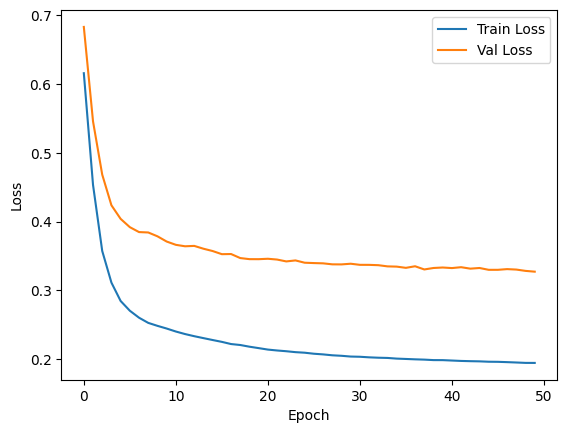

In [60]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

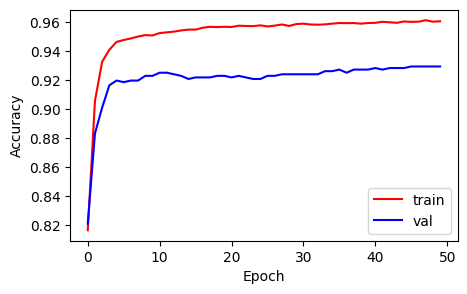

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(np.sqrt(history.history['binary_accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_binary_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=10)
ax.set_ylabel(r'Accuracy', fontsize=10)
ax.legend()
ax.tick_params(labelsize=10)

In [62]:
y_pred = model.predict(x_test)
def get_class_predictions(model, test_ds):
    y_pred_prob = model.predict(test_ds)
    predicted = tf.squeeze(y_pred)
    predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    return predicted

y_pred = get_class_predictions(model, x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
Confusion Matrix:
[[401  50]
 [  5  44]]
Accuracy: 0.89
F1 Score:  0.7756036262453999
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       451
           1       0.47      0.90      0.62        49

    accuracy                           0.89       500
   macro avg       0.73      0.89      0.78       500
weighted avg       0.94      0.89      0.90       500



### **Model 4**

1 hidden layers with 8 nodes for the layers. 

In [63]:
model = tf.keras.Sequential(
    [
        Dense(8, activation="relu",input_shape=(10,)),
        Dense(1, activation='sigmoid'),
    ]
)
model.summary()

/Users/patriciapepita/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.predict(val_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.4943092 ],
       [0.51287085],
       [0.7363952 ],
       [0.6666332 ],
       [0.6346862 ],
       [0.6125394 ],
       [0.68610233],
       [0.51330656],
       [0.514377  ],
       [0.7575086 ],
       [0.5256336 ],
       [0.70029557],
       [0.44301242],
       [0.65935624],
       [0.5321605 ],
       [0.45421222],
       [0.3731815 ],
       [0.47609124],
       [0.53966916],
       [0.11438099],
       [0.59376365],
       [0.46017396],
       [0.46808833],
       [0.5022438 ],
       [0.5087193 ],
       [0.6326484 ],
       [0.427251  ],
       [0.5695459 ],
       [0.48118502],
       [0.569026  ],
       [0.73375195],
       [0.4584977 ],
       [0.4961703 ],
       [0.5       ],
       [0.51992196],
       [0.59316677],
       [0.23986478],
       [0.63511425],
       [0.5281198 ],
       [0.72499   ],
       [0.5019466 ],
       [0.4437508 ],
       [0.5888864 ],
       [0.63078886],
       [0.81356245],
       [0.39852488],
       [0.5362163 ],
       [0.538

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
              , loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Accuracy()])

In [66]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 50)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.5981 - loss: 0.6936 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.6360 - val_loss: 0.6707
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.7444 - loss: 0.5833 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.7560 - val_loss: 0.5816
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8176 - loss: 0.4805 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8200 - val_loss: 0.4748
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8540 - loss: 0.3974 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8440 - val_loss: 0.4117
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8692 - loss: 0.3562 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8560 - val_loss: 0.3846
Epoch 6/50
227/227 ━━━━━━━━━━━

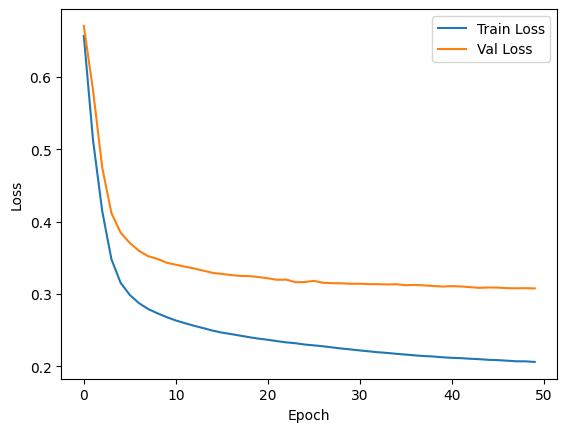

In [67]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

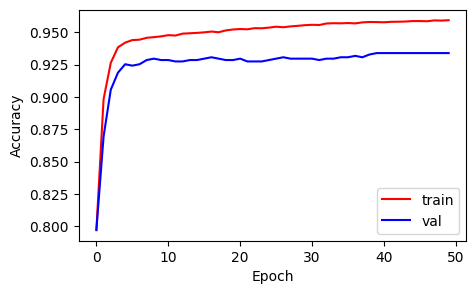

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(np.sqrt(history.history['binary_accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_binary_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=10)
ax.set_ylabel(r'Accuracy', fontsize=10)
ax.legend()
ax.tick_params(labelsize=10)

In [69]:
y_pred = model.predict(x_test)
def get_class_predictions(model, test_ds):
    y_pred_prob = model.predict(test_ds)
    predicted = tf.squeeze(y_pred)
    predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    return predicted

y_pred = get_class_predictions(model, x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
Confusion Matrix:
[[401  50]
 [  5  44]]
Accuracy: 0.89
F1 Score:  0.7756036262453999
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       451
           1       0.47      0.90      0.62        49

    accuracy                           0.89       500
   macro avg       0.73      0.89      0.78       500
weighted avg       0.94      0.89      0.90       500



### **Model 5**

1 hidden layers with 4 nodes for the layers. 

In [70]:
model = tf.keras.Sequential(
    [
        Dense(4, activation="relu",input_shape=(10,)),
        Dense(1, activation='sigmoid'),
    ]
)
model.summary()

/Users/patriciapepita/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.predict(val_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.3767732 ],
       [0.465792  ],
       [0.21321242],
       [0.19788371],
       [0.18744013],
       [0.44817027],
       [0.29792565],
       [0.3013623 ],
       [0.23040183],
       [0.21587723],
       [0.15454853],
       [0.13222001],
       [0.24107738],
       [0.2002896 ],
       [0.26590893],
       [0.46216747],
       [0.15836513],
       [0.3243874 ],
       [0.16717075],
       [0.05978621],
       [0.33309165],
       [0.23037758],
       [0.32002267],
       [0.48572588],
       [0.24483159],
       [0.17153384],
       [0.18854202],
       [0.45962235],
       [0.36222315],
       [0.298234  ],
       [0.4898651 ],
       [0.1276397 ],
       [0.4025696 ],
       [0.33515126],
       [0.10202255],
       [0.12368438],
       [0.42570233],
       [0.09948478],
       [0.23643774],
       [0.12605608],
       [0.52405524],
       [0.15663584],
       [0.28662387],
       [0.11844604],
       [0.31180516],
       [0.32276198],
       [0.46619394],
       [0.102

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
              , loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Accuracy()])

In [73]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 50)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8343 - loss: 0.4222 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8300 - val_loss: 0.4499
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8433 - loss: 0.4097 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8360 - val_loss: 0.4391
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8495 - loss: 0.3869 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8340 - val_loss: 0.4091
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8561 - loss: 0.3599 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8480 - val_loss: 0.3848
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.0000e+00 - binary_accuracy: 0.8614 - loss: 0.3384 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.8520 - val_loss: 0.3678
Epoch 6/50
227/227 ━━━━━━━━━━━

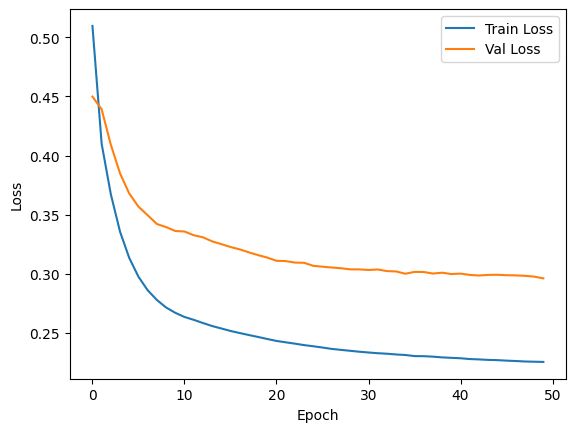

In [74]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

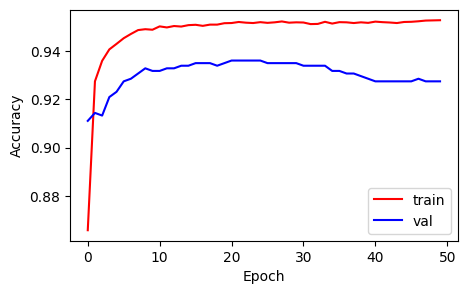

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(np.sqrt(history.history['binary_accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_binary_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=10)
ax.set_ylabel(r'Accuracy', fontsize=10)
ax.legend()
ax.tick_params(labelsize=10)

In [76]:
y_pred = model.predict(x_test)
def get_class_predictions(model, test_ds):
    y_pred_prob = model.predict(test_ds)
    predicted = tf.squeeze(y_pred)
    predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    return predicted

y_pred = get_class_predictions(model, x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
Confusion Matrix:
[[398  53]
 [  7  42]]
Accuracy: 0.88
F1 Score:  0.756619937694704
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       451
           1       0.44      0.86      0.58        49

    accuracy                           0.88       500
   macro avg       0.71      0.87      0.76       500
weighted avg       0.93      0.88      0.90       500



#### Model Result Summary

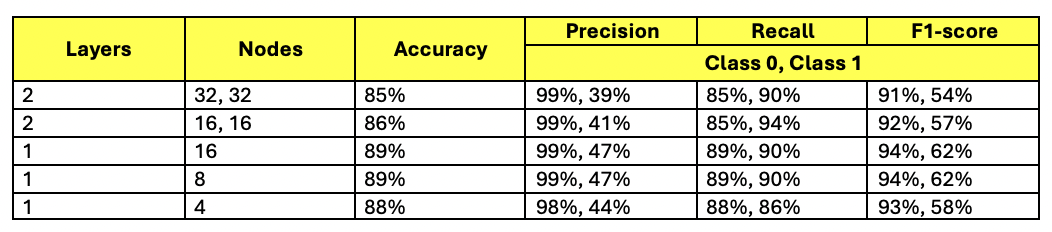

#### Looking at the result, the best model is from model 3 (1 hidden layer with 16 neurons) and model 4 (1 hidden layer with 8 neurons). They both created same evaluation results.

### **Hyperparameter Tuning with Bayesian Optimization**

In [78]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU


LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

/Users/patriciapepita/Library/Python/3.9/lib/python/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [90]:
score_acc = make_scorer(accuracy_score)

def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, x_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [91]:
params_nn2 ={
    'neurons': (2, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.0001, 1),
    'batch_size':(4, 1000),
    'epochs':(10, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | nan       | 5.51      | 172.4     | 0.4361    | 0.2308    | 36.58     | 1.298     | 1.045     | 0.4203    | 25.39     | 0.3377    | 6.935     |
| 2         | nan       | 2.14      | 84.87     | 0.6696    | 0.1864    | 34.68     | 1.932     | 1.237     | 0.07405   | 90.28     | 0.794     | 5.884     |
| 3         | nan       | 7.337     | 991.0     | 0.5773    | 0.2441    | 47.92     | 1.055     | 1.908     | 0.1054    | 82.09     | 0.6977    | 3.957     |
| 4         | nan       | 2.468     | 998.5     | 0.138     | 0.1846    | 53.65     | 1.81      | 2.456     | 0.3229    | 41.25     | 0.319     | 6.631     |
| 5         | nan       | 8.268     | 814.6     | 0.

ValueError: Input y contains NaN.

In [92]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'elu',
 'batch_size': 172,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 37,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.42028246981533124,
 'neurons': 25,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.src.optimizers.ftrl.Ftrl at 0x2ac1014f0>}

In [93]:
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=10, activation=params_nn_['activation']))
    
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn

nn_model = nn_cl_fun()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = nn_model.fit(x_train, y_train, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                       validation_split=0.1, callbacks=[es], verbose=1)

Epoch 1/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5568 - loss: 0.6874 - val_accuracy: 0.0000e+00 - val_loss: 0.7741
Epoch 2/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5687 - loss: 0.6698 - val_accuracy: 0.9641 - val_loss: 0.1957
Epoch 3/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8849 - loss: 0.2889 - val_accuracy: 0.9282 - val_loss: 0.2457
Epoch 4/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8933 - loss: 0.2645 - val_accuracy: 0.9365 - val_loss: 0.2472
Epoch 5/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8954 - loss: 0.2659 - val_accuracy: 0.9337 - val_loss: 0.2549
Epoch 6/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9060 - loss: 0.2401 - val_accuracy: 0.9365 - val_loss: 0.2351
Epoch 7/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8980 - loss: 0.2500 - val_accuracy: 0.9406 - val_loss: 0.2192
Epoch 8/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.9001 - loss: 0.2438 - val_accuracy: 0.95

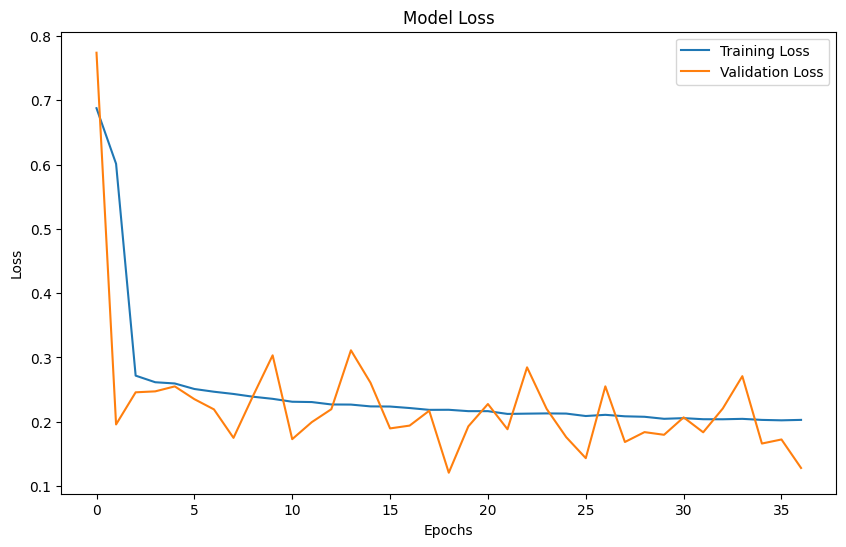

In [94]:
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

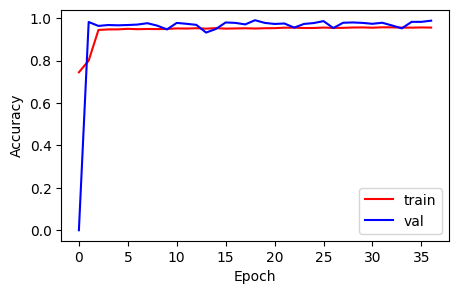

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(np.sqrt(history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=10)
ax.set_ylabel(r'Accuracy', fontsize=10)
ax.legend()
ax.tick_params(labelsize=10)

In [96]:
y_pred = nn_model.predict(x_test)

def get_class_predictions(nn_model, test_ds):
    y_pred_prob = nn_model.predict(test_ds)
    predicted = tf.squeeze(y_pred)
    predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
    return predicted

y_pred = get_class_predictions(nn_model, x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
Confusion Matrix:
[[409  42]
 [  7  42]]
Accuracy: 0.902
F1 Score:  0.7875311115158137
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       451
           1       0.50      0.86      0.63        49

    accuracy                           0.90       500
   macro avg       0.74      0.88      0.79       500
weighted avg       0.94      0.90      0.91       500



#### **Model Comparison**

Before (best model; model 3 & 4)
- Accuracy: 89%  
- Precision: 99%, 47%  
- Recall: 89%, 90%   
- F1-score: 94%, 62%

After (with bayesian optimization)
- Accuracy: 90%
- Precision: 98%, 50%
- Recall: 91%, 86%
- F1-score: 94%, 63%

The hyperparameter tuning with Bayesian Optimization created better result compared to manual tuning. 

## **Feature Importance**

In [101]:
weights = nn_model.get_weights()
feature_importance = np.sum(np.abs(weights[0]), axis=1)

In [102]:
print(feature_importance)

[5.137165  9.8240595 2.1584108 9.777851  3.1670713 3.3378196 6.502523
 8.7173815 6.6668997 7.416472 ]


Higher values mean they contribute more to the output. Therefore, 3 features that significantly contribute to the output are features 2 (`income`), 4 (`family`), 8 (`cd account`).

On the other hand, features that have minimal contribution are feature 3 (`zip code`), 5 (`ccavg`), 6 (`mortgage`).